# Przetwarzanie sygnałów i obrazów: Sprawozdanie 001


In [1]:
from matplotlib import pyplot, ticker
from numpy import ndarray, arange, array, pi, sin, cos, matrix
from scipy import signal

## Zadanie 1.1
Sporządź wykres funkcji y = x^2 + 5, w dziedzinie od -10 do 10.

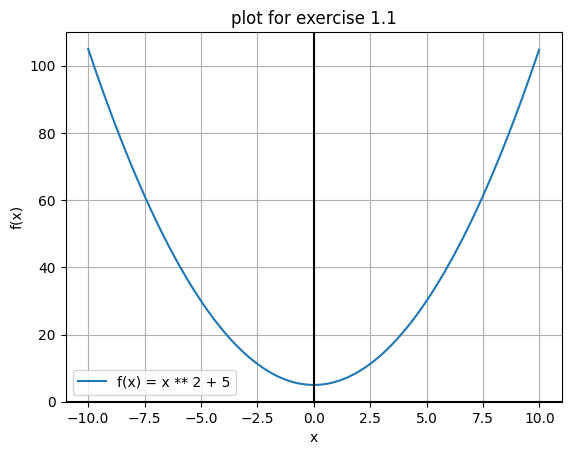

In [2]:
x_values: ndarray = arange(-10, 10, 0.01)
y_values: ndarray = array(x_values ** 2 + 5)

_, ax = pyplot.subplots()

ax.plot(x_values, y_values, label='f(x) = x ** 2 + 5')

ax.grid(True, which='both')

ax.set_title('plot for exercise 1.1')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.legend()

pyplot.show()

## Zadanie 1.2
Na jednym rysunku sporządź wykres funkcji sin(x) oraz cos(x), w dziedzinie od 0 do 2PI


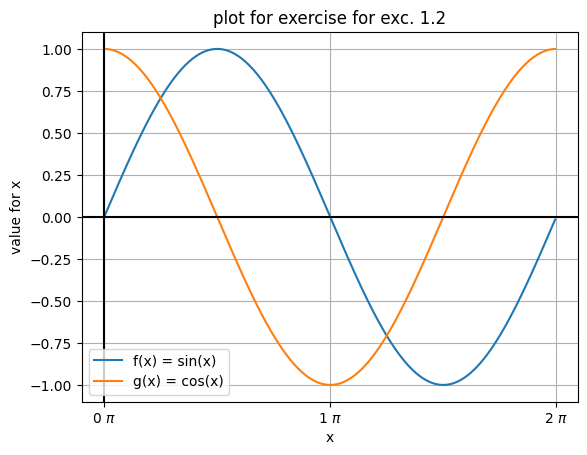

In [3]:
x_values: ndarray = arange(0, 2 * pi, pi / 200)
sin_values: ndarray = sin(x_values)
cos_values: ndarray = cos(x_values)

_, ax = pyplot.subplots()

ax.plot(x_values / pi, sin_values, label='f(x) = sin(x)')
ax.plot(x_values / pi, cos_values, label='g(x) = cos(x)')

ax.grid(True, which='both')

ax.set_xlabel('x')
ax.set_ylabel('value for x')
ax.set_title('plot for exercise for exc. 1.2')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

ax.legend()

pyplot.show()

## Zadanie 1.3
Sporządź wykres sygnału sinusoidalnego o częstotliwości 1kHz i amplitudzie 2V w zakresie od 0 do 5ms.


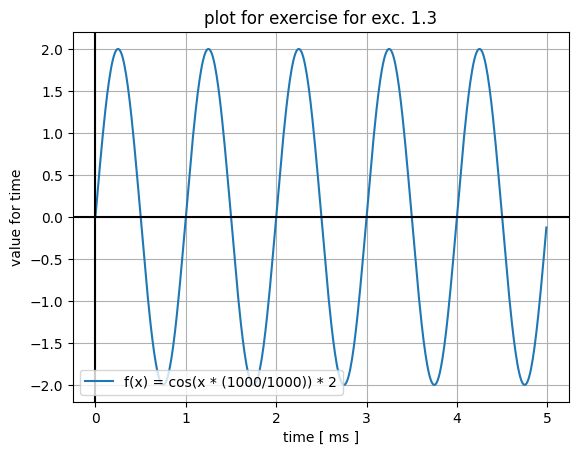

In [4]:
time: ndarray = arange(0, 5, 0.01)
sin_values: ndarray = array(sin(2 * pi * time * (1000 / 1000)) * 2)

_, ax = pyplot.subplots()

ax.plot(time, sin_values, label='f(x) = cos(x * (1000/1000)) * 2')

ax.grid(True, which='both')

ax.set_xlabel('time [ ms ]')
ax.set_ylabel('value for time')
ax.set_title('plot for exercise for exc. 1.3')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.legend(loc=3)

pyplot.show()

## Zadanie 1.4
Powtórz Zadanie 1.3 dla sygnałów
- a) Cosinusoidalny
- b) Prostokątny
- c) Trójkątny
- d) Piłokształtny


In [5]:
def create_signal(type: str, time: ndarray):
    return {
        'sin': lambda: array(sin(2 * pi * time * (1000 / 1000)) * 2),
        'cos': lambda: array(cos(2 * pi * time * (1000 / 1000)) * 2),
        'square': lambda: array(signal.square(2 * pi * time * (1000 / 1000)) * 2),
        'triangle': lambda: array(signal.sawtooth(2 * pi * time * (1000 / 1000), 0.5) * 2),
        'sawtooth': lambda: array(signal.sawtooth(2 * pi * time * (1000 / 1000)) * 2)
    }[type]()


def show_plot(title: str, xs: ndarray, ys: ndarray):
    _, ax = pyplot.subplots()

    ax.plot(xs, ys)
    ax.grid(True, which='both')

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

    ax.set_title(title)
    ax.set_xlabel('time [ ms ]')
    ax.set_ylabel('value for time')

    pyplot.show()

In [6]:
time: ndarray = arange(0, 5, 0.01)

### A) Wykres dla sygnału: Cosinusoidalny

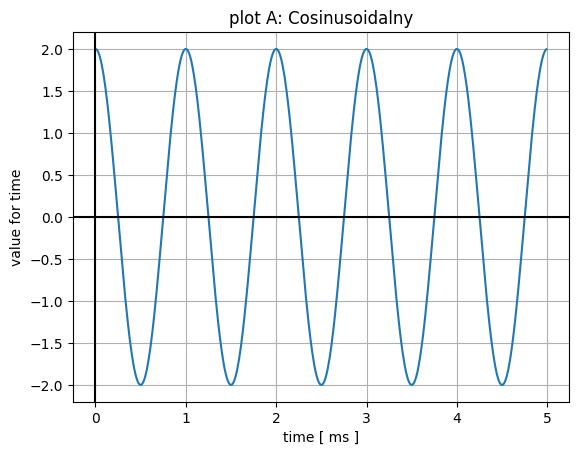

In [7]:
show_plot('plot A: Cosinusoidalny', time, create_signal('cos', time))

### B) Wykres dla sygnału: Prostokątny

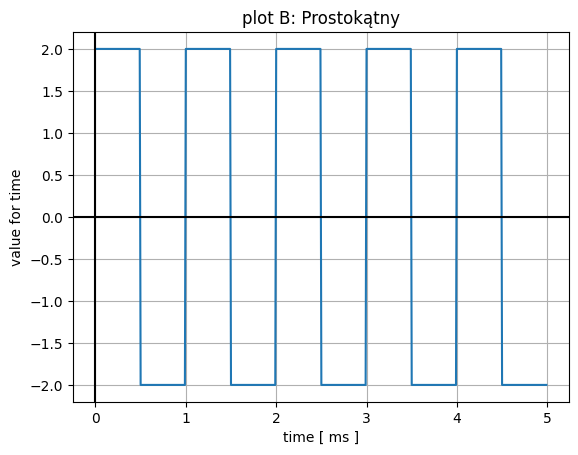

In [8]:
show_plot('plot B: Prostokątny', time, create_signal('square', time))

### C) Wykres dla sygnału: Trójkątny

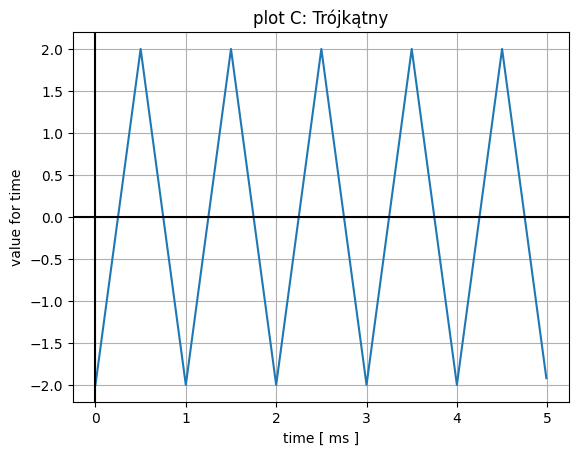

In [9]:
show_plot('plot C: Trójkątny', time, create_signal('triangle', time))

### D) Wykres dla sygnału: Piłokształtny


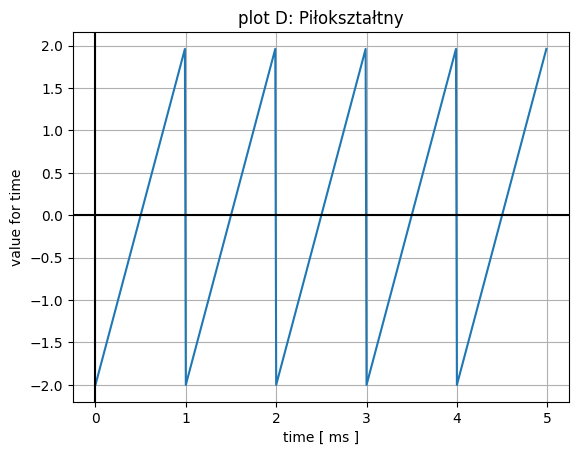

In [10]:
show_plot('plot D: Piłokształtny', time, create_signal('sawtooth', time))


## Zadanie 1.5
Samodzielnie przestudiować metody tworzenia i modyfikowania macierzy oraz metody sporządzania wykresów, korzystając z opdowiedniego samouczka.


[[  92 -106  120]
 [ 102 -117  132]
 [ 112 -128  144]]


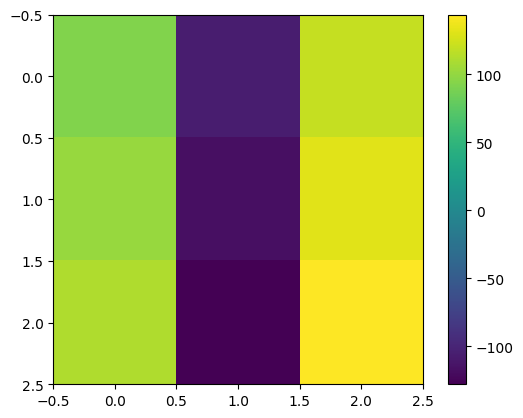

In [11]:
matrix_a: matrix = matrix('1 2 3; 4 5 6; 7 8 9')
matrix_b: matrix = matrix('1 1 1; 2 2 2; 3 3 3')
matrix_c: matrix = matrix('-1 2 -3; 4 -5 6; 7 -8 9')

matrix_result = (matrix_a + matrix_b).transpose() * matrix_c
print(matrix_result)

pyplot.imshow(matrix_result)
pyplot.colorbar()
pyplot.show()
